# The Perceptron Algorithm using the Iris Dataset


Perceptron is a single layer neural network algorithm that is a classifier of two objects or items. The algorithm is what is called supervised learning, where we give both the data and the known result to the algorithm to be used to predict and correctly classify the data given.

In this Jupyter notebook, we implement the perceptron model using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

In [1]:
using RDatasets
using Plots

We have selected our two sets of data for our model to work on. We give this data into the variable x-data where it holds the given features. 

Using the Iris Dataset, we are able to choose two features in our dataset to include in a tuple in the variable **x_data**. We also choose our output label of **y_data** that is -1 or 1 depending of the known outcome. Our data contains text but our algorthim will only accpet values. In this case, we will transform our y_data into the -1 or 1.



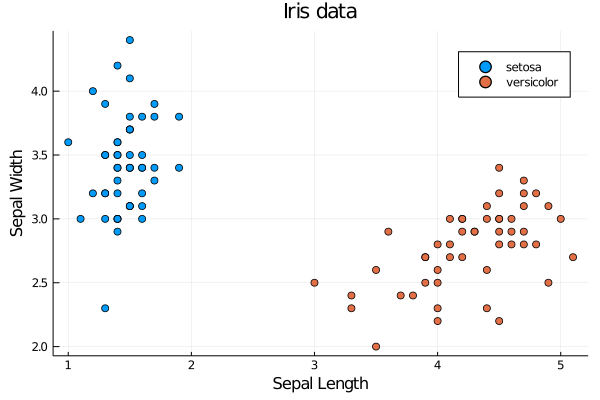

In [2]:
"Read iris data sets from RDatasets"

iris = dataset("datasets", "iris")

"Extract the first two features from the first 100 rows of data. These two features can be changed to select new features"

x_data = [x for x in zip(iris.PetalLength[1:100], iris.SepalWidth[1:100])]

"Encode labels with numeric value"
y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]


"Plot data to verify the data seperation"

scatter(x_data[1:50], 
        label = "setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris data")


scatter!(x_data[51:100],
        label = "versicolor")

The algorithm contains two functions that we are able to use to check and update our input to produce an output. These two functions require serveral inputs inorder for function to be active. 
<ul>
<li>Sign Function : Dot product of two inputs to produce -1 or 1 as output</li>
<li>Update Function: Update function to check output of the sign function to match the y_data and update the function if needed. </li>
</ul>

We will also create an error function that will track the total ammount of errors as a result of the update fucntion on each cycle of all the data.

In [3]:
function Sign(weights, x)
    """ Sign function input factor in out algorithm. We are using this function to find the 
        dot product of the weights and x vector in out algorithm.
    
    Args:
        weight (Array): The parameter within a neural network that transforms input data within the network's hidden layers.
                        These are random input based on the size of your x_data vector size
    
        x ([tuple]):    Tuple input of one tuple of the x_data that had been selected before
    
    Output:
                        Returns a value of -1 or 1 depending on the dot product
    """

    x̂ = [x[1],x[2],1.0]
    return weights'x̂ > 0 ? 1 : -1
end


function perceptron_update(weights, x,y)
    """ Function to check output of the sign function to match the y_data. 
        This update function will only update on error of Sign function and y_data.
        Otherwise, no update in the weight value
    
    Args:
        weights (Array):Array of updated weight values to be used in network classification
        x (Tuple):      Tuple input of the data selected one point at a time
        y (Array) :     Array of listed of -1 or 1 that represents the correct classification of data
    
    Output:
                        Returns the updated or non-updated weight values
    """
    if Sign(weights,x) != y
        weights += y*[x[1],x[2],1.0]
    end
    return weights
end

function Error(weights, feature_set, labels)
    """ Function that sums an array for the length of the feature set to calcuate the 
        total amount of errors in the feature set. 0 if correct and 1 if wrong classification 
    
    Args:
        weights (Array):Array of updated weight values to be used in network classification
        x (Tuple):      Tuple input of the data selected one point at a time
        y (Array) :     Array of listed of -1 or 1 that represents the correct classifcation of data
    
    Output:
                        Number of errors in this feature set input into the algorithm on this run
    """
        return sum([Sign(weights, feature_set[i]) != labels[i] ? 1 : 0 for i = 1:length(feature_set)])
end

Error (generic function with 1 method)

#### Perceptron Update Geometry
![Perceptron update](Perceptron_update.png)

If there is an output that is incorrect (postitive or negative) that does not match the one listed in y_data, the progrm will update and shift the result in the correct ouput with an update. The value of the weight is also updated in this process. 


Below is the implemented algorthim with all the parts of the *Sign*, *Perceptron Update* and *Error* functions. 

In [4]:
function perceptron_learning_algorithm(weights, feature_set, labels, ϵ)
    """ Function that uses all the previous created functions. Perceptron Algorithm. 
    
    Args:
        weights (Array):     Array of updated weight values to be used in network classification
        feature set (Tuple): Input of all the x_data selected out before    
        labels (Array):      Array of listed of -1 or 1 that represents the correct classifcation of data based on our data
        ϵ (int):             Epslion is the error value that we target for, function will continue until this error value is reached
    
    Output:
        weights: updated     Weights in the algorithm 
        Weight Vector:       Listed of updated weight values over each iteration 
        Error measures:      Array of the count of errors each iteration 
    """

    error_measures = []
    append!(error_measures, Error(weights,feature_set,labels))
    
    weight_vector = []
    
    while Error(weights, feature_set, labels) > ϵ
        for i = 1:length(feature_set)
            weights = perceptron_update(weights, feature_set[i], labels[i])
        end
        append!(weight_vector,weights)
        append!(error_measures, Error(weights, feature_set, labels))
    end
    
    
    return weights, weight_vector, error_measures
end

perceptron_learning_algorithm (generic function with 1 method)

In [7]:
w, W, errors = perceptron_learning_algorithm(randn(3), x_data, y_data, 0)

([-5.60495, 5.43616, 2.0816], Any[-3.50495, -2.76384, 0.0816033, -5.10495, 0.836155, 1.0816, -7.00495, 1.93616, 1.0816, -5.60495, 5.43616, 2.0816], Any[50, 50, 50, 48, 0])

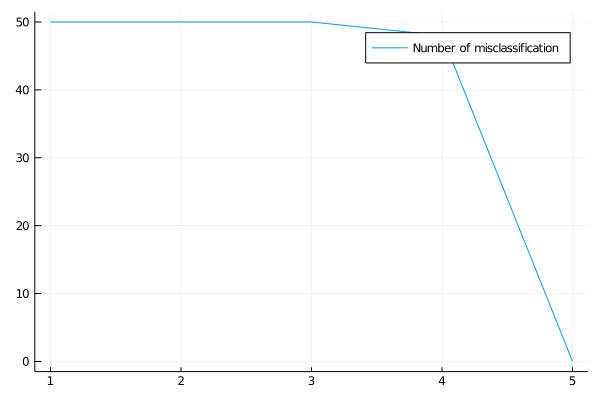

In [8]:
plot(errors,
    labels = "Number of misclassification")

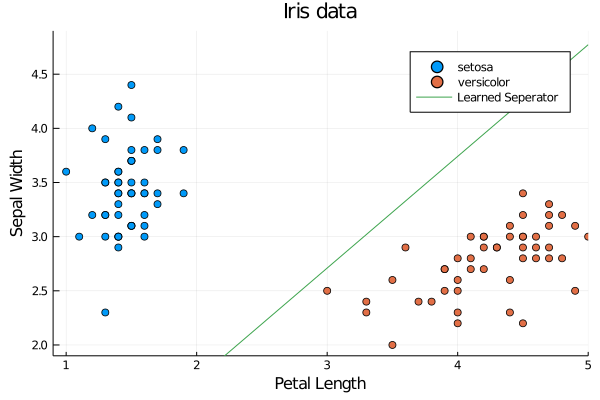

In [9]:
scatter(x_data[1:50], 
        label = "setosa",
        xaxis = "Petal Length",
        yaxis = "Sepal Width",
        title = "Iris data")


scatter!(x_data[51:100],
        label = "versicolor")


plot!(x-> (-x*w[1] - w[3])/w[2], label = "Learned Seperator", xlims = (.90,5), ylims = (1.90,4.90))
#, xlims = (4.00,7.00), ylims = (.75,5.50)
#, xlims = (-.50,5.50), ylims = (1.25,5.50)

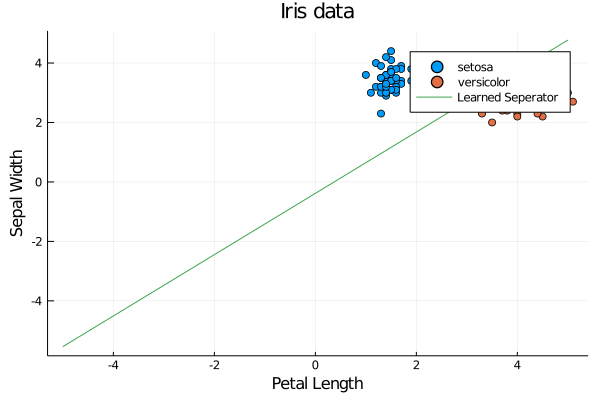

In [10]:
scatter(x_data[1:50], 
        label = "setosa",
        xaxis = "Petal Length",
        yaxis = "Sepal Width",
        title = "Iris data")


scatter!(x_data[51:100],
        label = "versicolor")


plot!(x-> (-x*w[1] - w[3])/w[2], label = "Learned Seperator")
#, xlims = (4.00,7.00), ylims = (.75,5.50)
#, xlims = (-.50,5.50), ylims = (1.25,5.50)